0부터9까지의 숫자를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

데이터의 형태 확인하기

In [2]:
# 훈련 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


In [3]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

데이터 그려보기

Text(0.5, 1.0, '2-th data, label is 4')

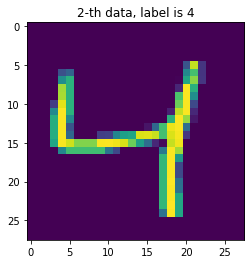

In [4]:
import matplotlib.pyplot as plt
import numpy as np

idx = 2
img = x_train[idx, :]
label = y_train[idx]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx,label))

검증 데이터 만들기

In [5]:
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
                                                  test_size=0.3,
                                                  random_state=777)

In [6]:
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증데이터 (18000, 28, 28) 레이블 (18000,)


모델 입력을 위한 훈련 데이터(손글씨 이미지) 전처리

1_ 2차원 배열 -> 1차원 배열로 변경 (28*28 = 784)

In [7]:
# 모델의 입력으로 사용하기 위한 전처리 과정

num_x_train = x_train.shape[0] #42000
num_x_val = x_val.shape[0] #18000
num_x_test = x_test.shape[0] #10000

In [8]:
# 2차원 배열 -> 1차원 배열로 변경 (28*28 =784)

x_train = (x_train.reshape((num_x_train,28*28)))
x_val = (x_val.reshape((num_x_val,28*28)))
x_test = (x_test.reshape((num_x_test,28*28)))

print(x_train.shape)  # 모델 입력을 위해 데이터를 784의 1차원으로 변경
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [9]:
# 데이터 스케일링 0~255 -> 0~1 MinMax 알고리즘 사용

x_train = x_train /255
x_val = x_val / 255
x_test = x_test / 255

print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.09803922 0.49411765 0.81568627 0.99607843 

모델 입력을 위한 데이블(정답) 전처리

In [10]:
print(y_train)

[2 7 6 ... 3 4 5]


In [12]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이브 0~9 숫자 값을 범주형 형태로 변경

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [13]:
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


모델 구성하기

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 설정하기

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 17s 6ms/step - loss: 0.9261 - accuracy: 0.7248 - val_loss: 0.2480 - val_accuracy: 0.9287
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2249 - accuracy: 0.9360 - val_loss: 0.1823 - val_accuracy: 0.9483
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1640 - accuracy: 0.9525 - val_loss: 0.1625 - val_accuracy: 0.9527
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1312 - accuracy: 0.9606 - val_loss: 0.1453 - val_accuracy: 0.9561
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1139 - accuracy: 0.9672 - val_loss: 0.1419 - val_accuracy: 0.9597
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0964 - accuracy: 0.9715 - val_loss: 0.1247 - val_accuracy: 0.9638
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0861 - accuracy: 0.9748 - val_loss: 0.1182 - val_accuracy: 0.9642
Epoch

학습 결과 그리기

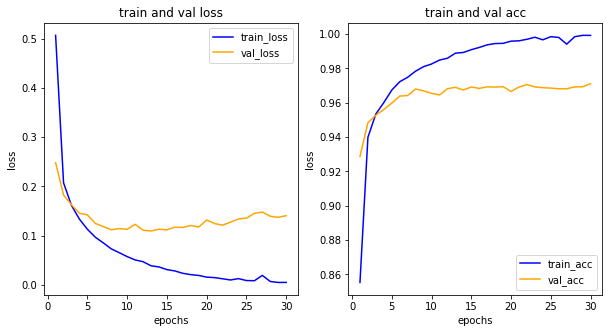

In [20]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

모델 평가하기

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9722


[0.12086540460586548, 0.9721999764442444]

예측값 그려서 확인해보기

In [22]:
import numpy as np
np.set_printoptions(suppress=True)

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[0.        0.        0.        0.0000077 0.        0.0000001 0.
 0.9999924 0.        0.       ]


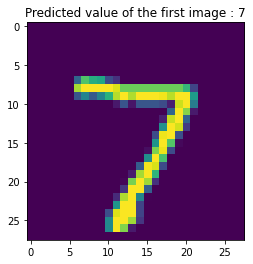

In [23]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

모델 평가 방법1-혼동 행렬

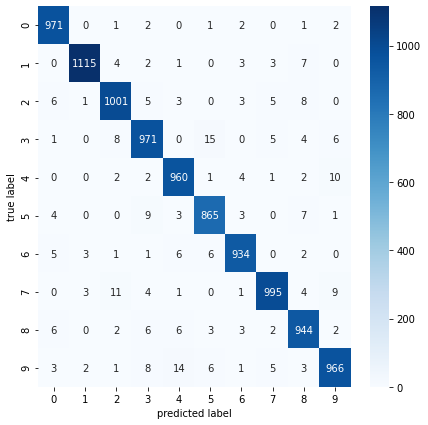

In [24]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

모델 평가 방법 2 - 분류 보고서

In [25]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.96      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

